In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import os
import glob
%matplotlib inline

In [3]:
Path="/media/ilker/Ilker/CRAB/07_20_2022/S1_counts/*.txt"
files = glob.glob(Path,recursive=True)

In [4]:
def getValues(files,weight):
    values={"S1_PHOTOCATHODE":np.array([]),"S2_PHOTOCATHODE":np.array([])}
    for i in files:
        count=0
        with open(i) as f:
            next(f)
            lines=f.readlines()
            for line in lines:
                splitline=line.split(",")
                values[splitline[0]]=np.append(values[splitline[0]],round(int(splitline[1])/weight))
        f.close()
        
    return values

def Histogram(data,xlabel,ylabel,title,figsize=(12,8),dpi=300,bins=3):
    plt.figure(figsize=figsize,dpi=dpi)
    plt.hist(data,bins=bins)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

        

In [5]:
S1=getValues(files,1)


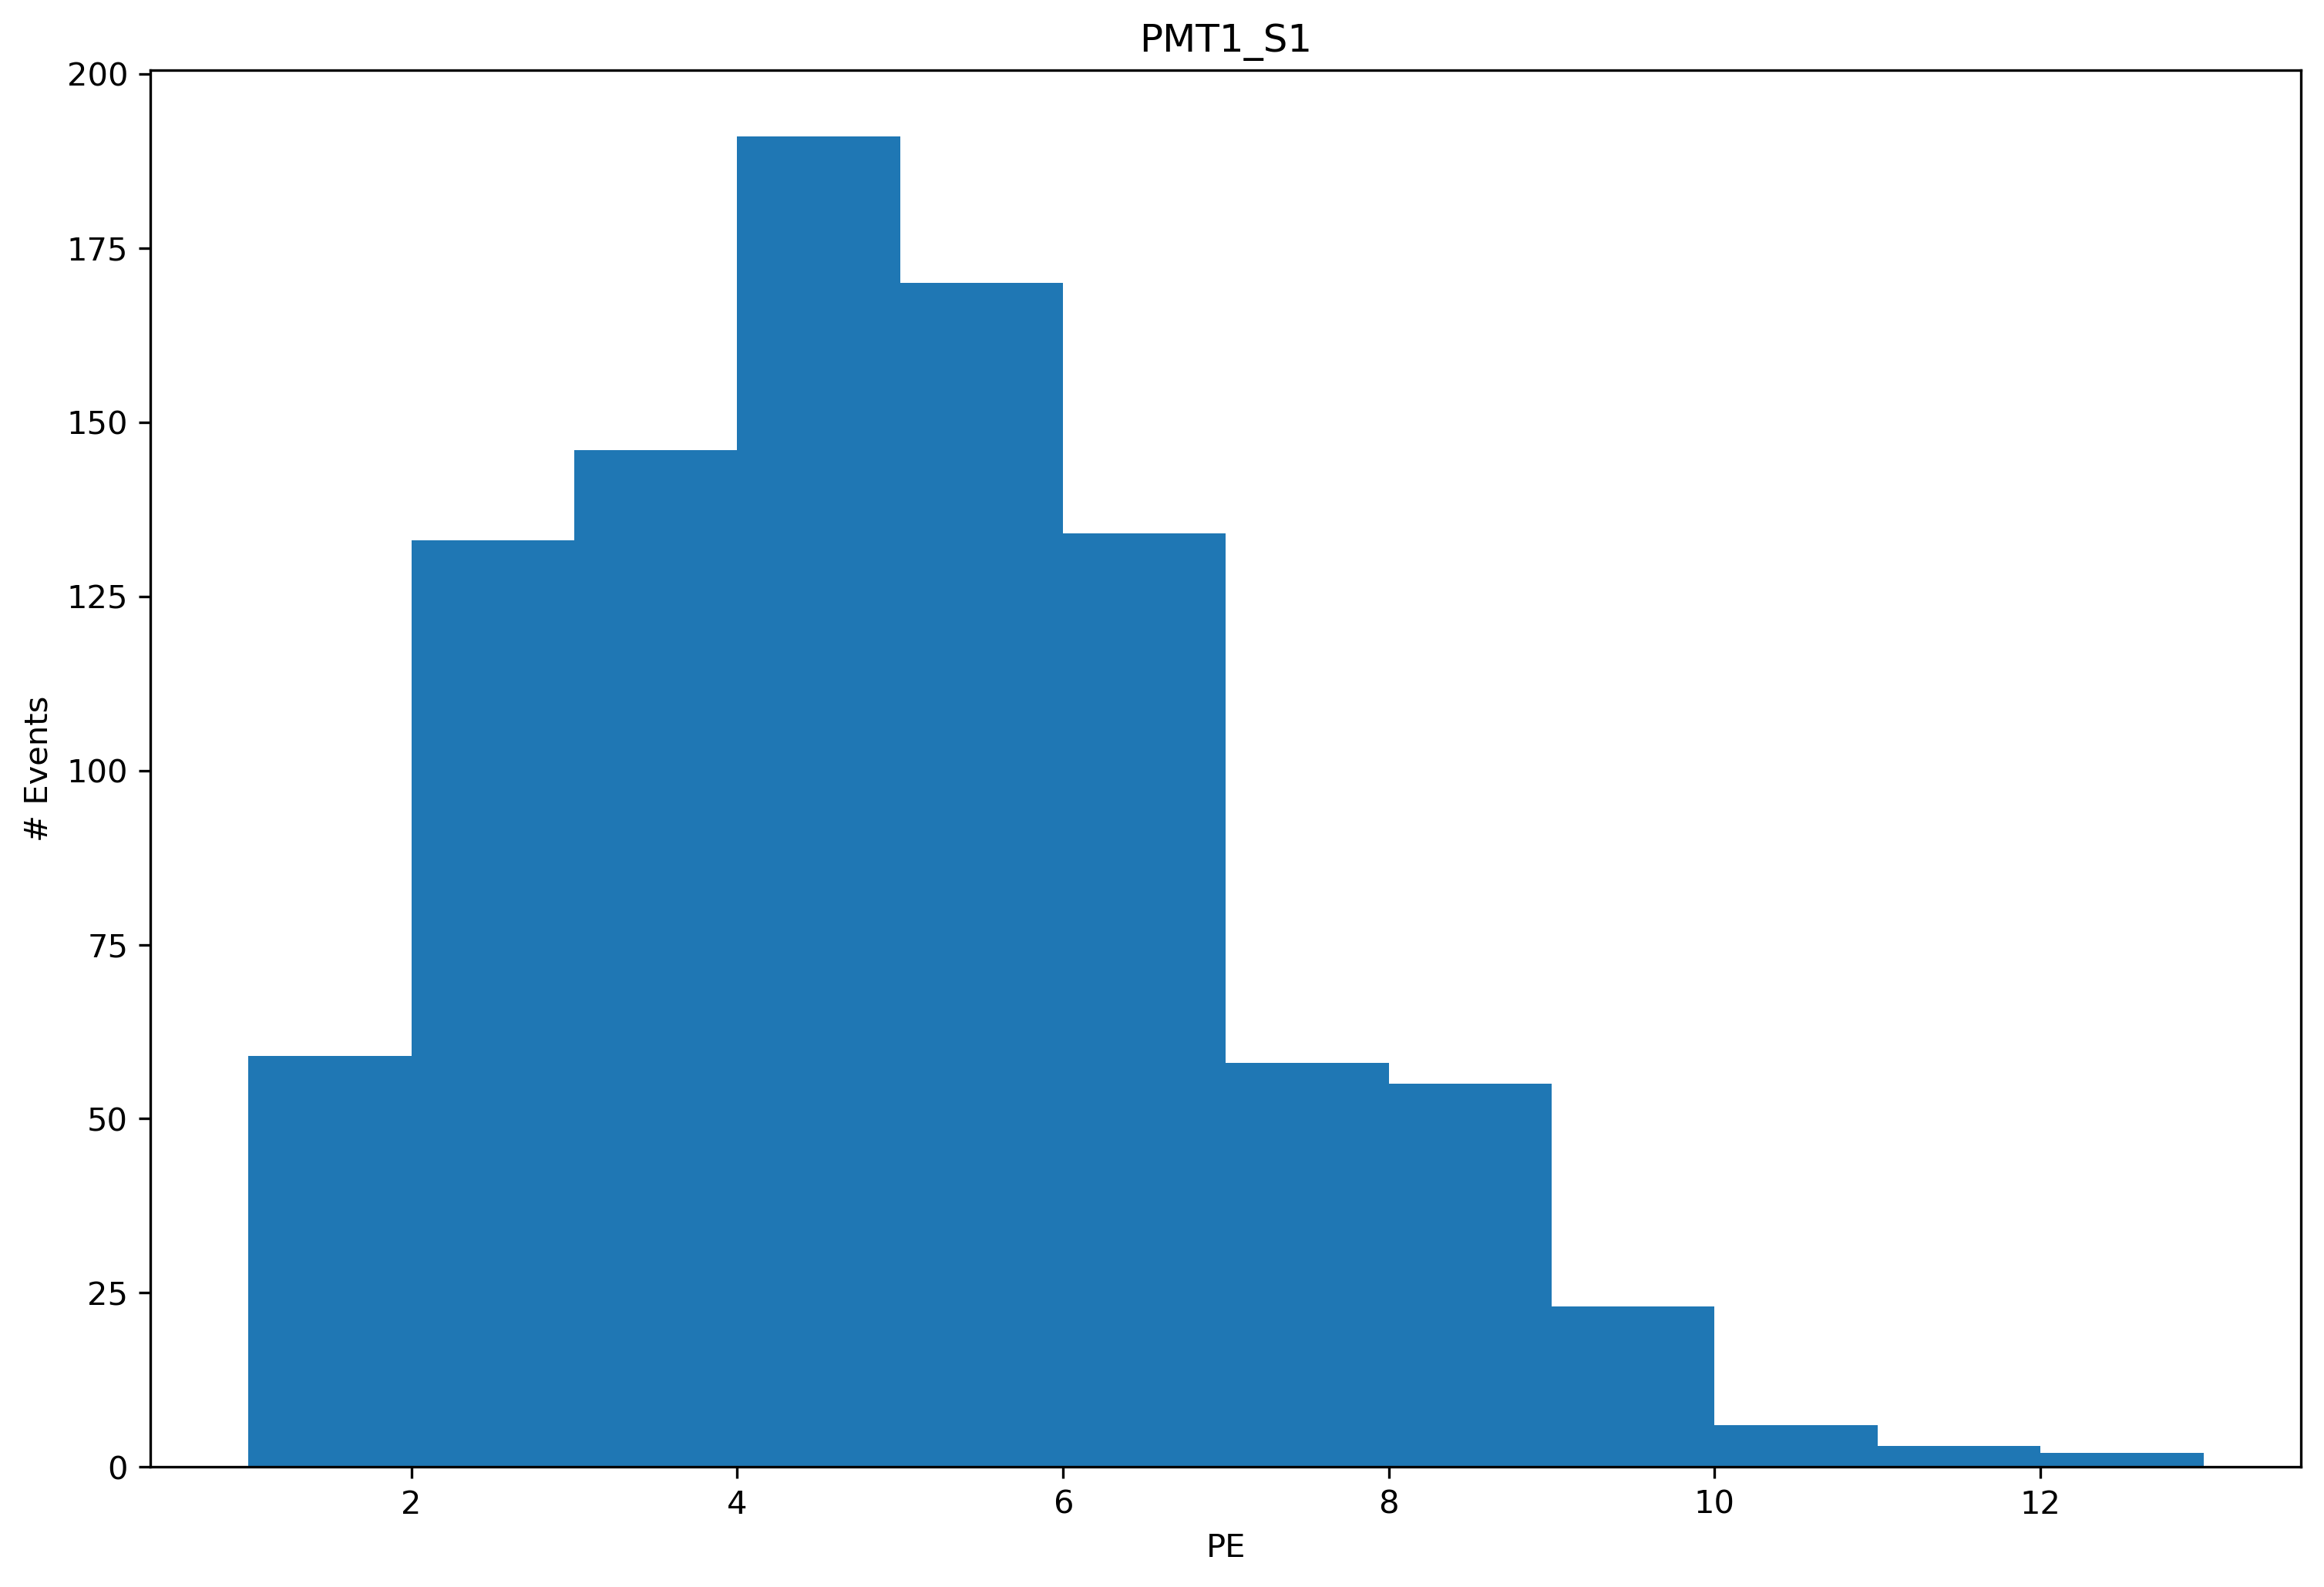

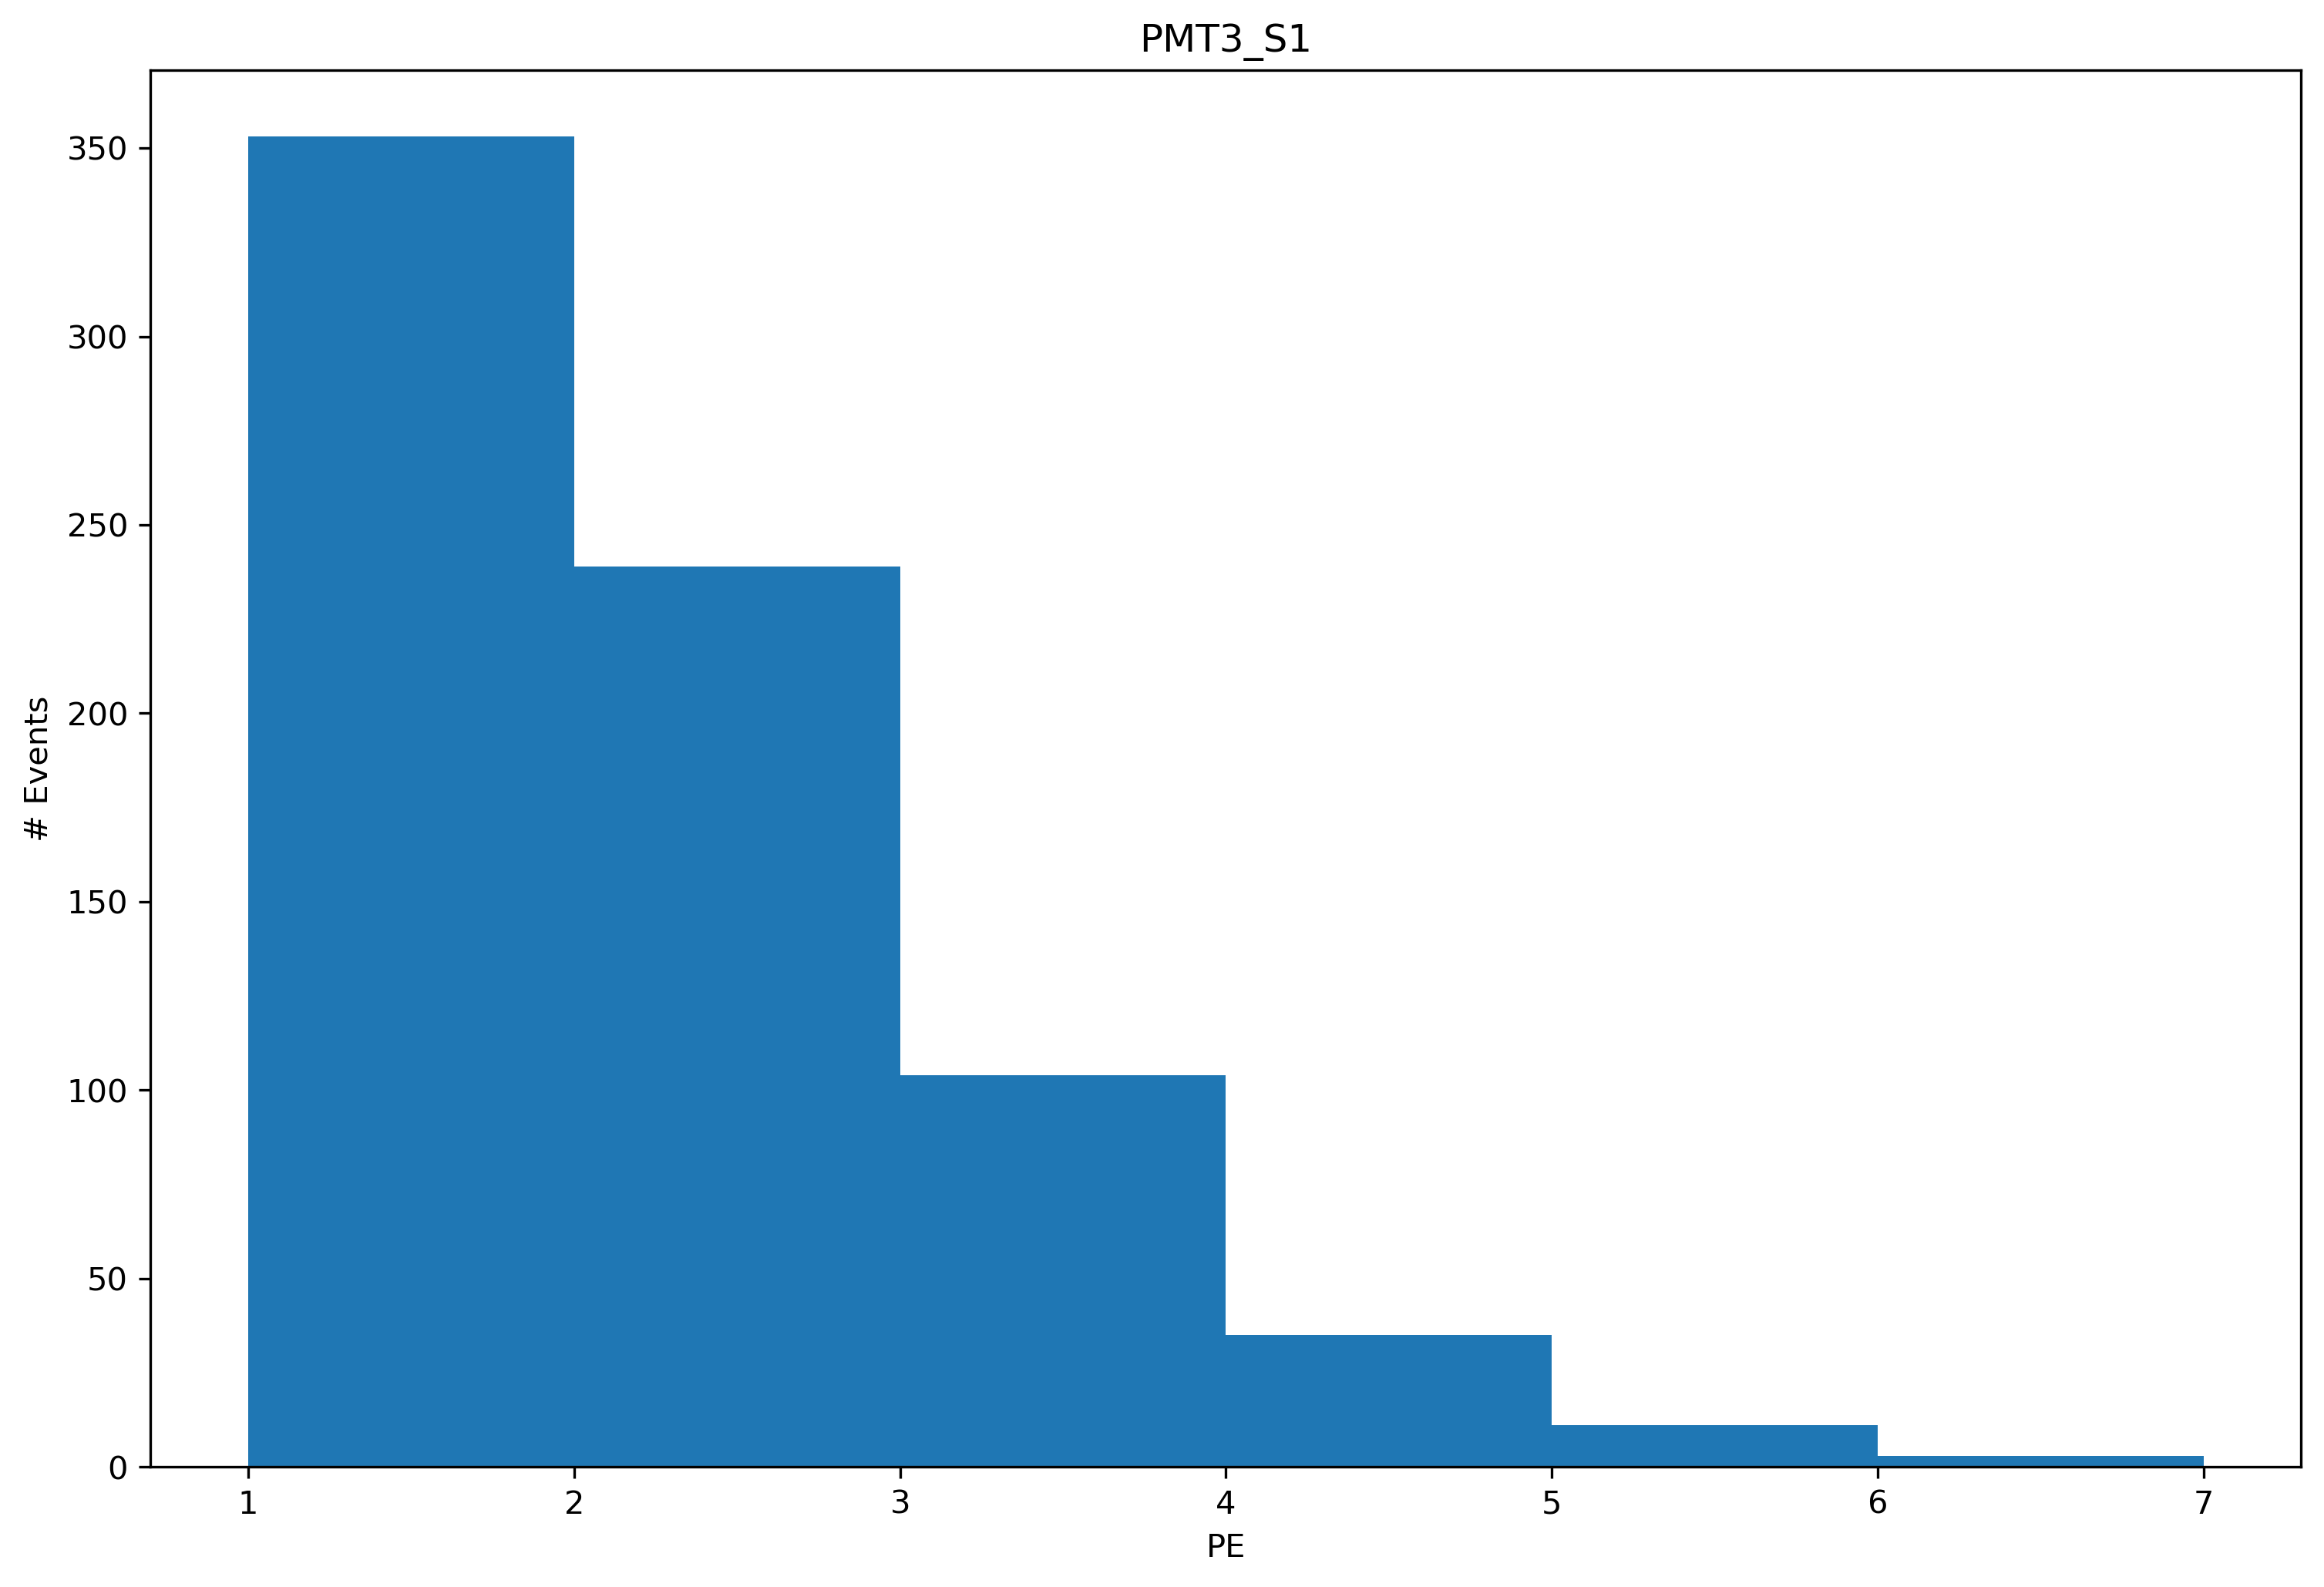

In [10]:

Histogram(S1["S2_PHOTOCATHODE"],"PE","# Events","PMT1_S1",bins=12)
Histogram(S1["S1_PHOTOCATHODE"],"PE","# Events","PMT3_S1",bins=6)

In [13]:
PMT1_S1_mean=st.mean(S1["S2_PHOTOCATHODE"])
PMT3_S1_mean=st.mean(S1["S1_PHOTOCATHODE"])
Path="/media/ilker/Ilker/CRAB/07_20_2022/S2_counts/*.txt"
S2files = glob.glob(Path,recursive=True)
S2=getValues(S2files,1)


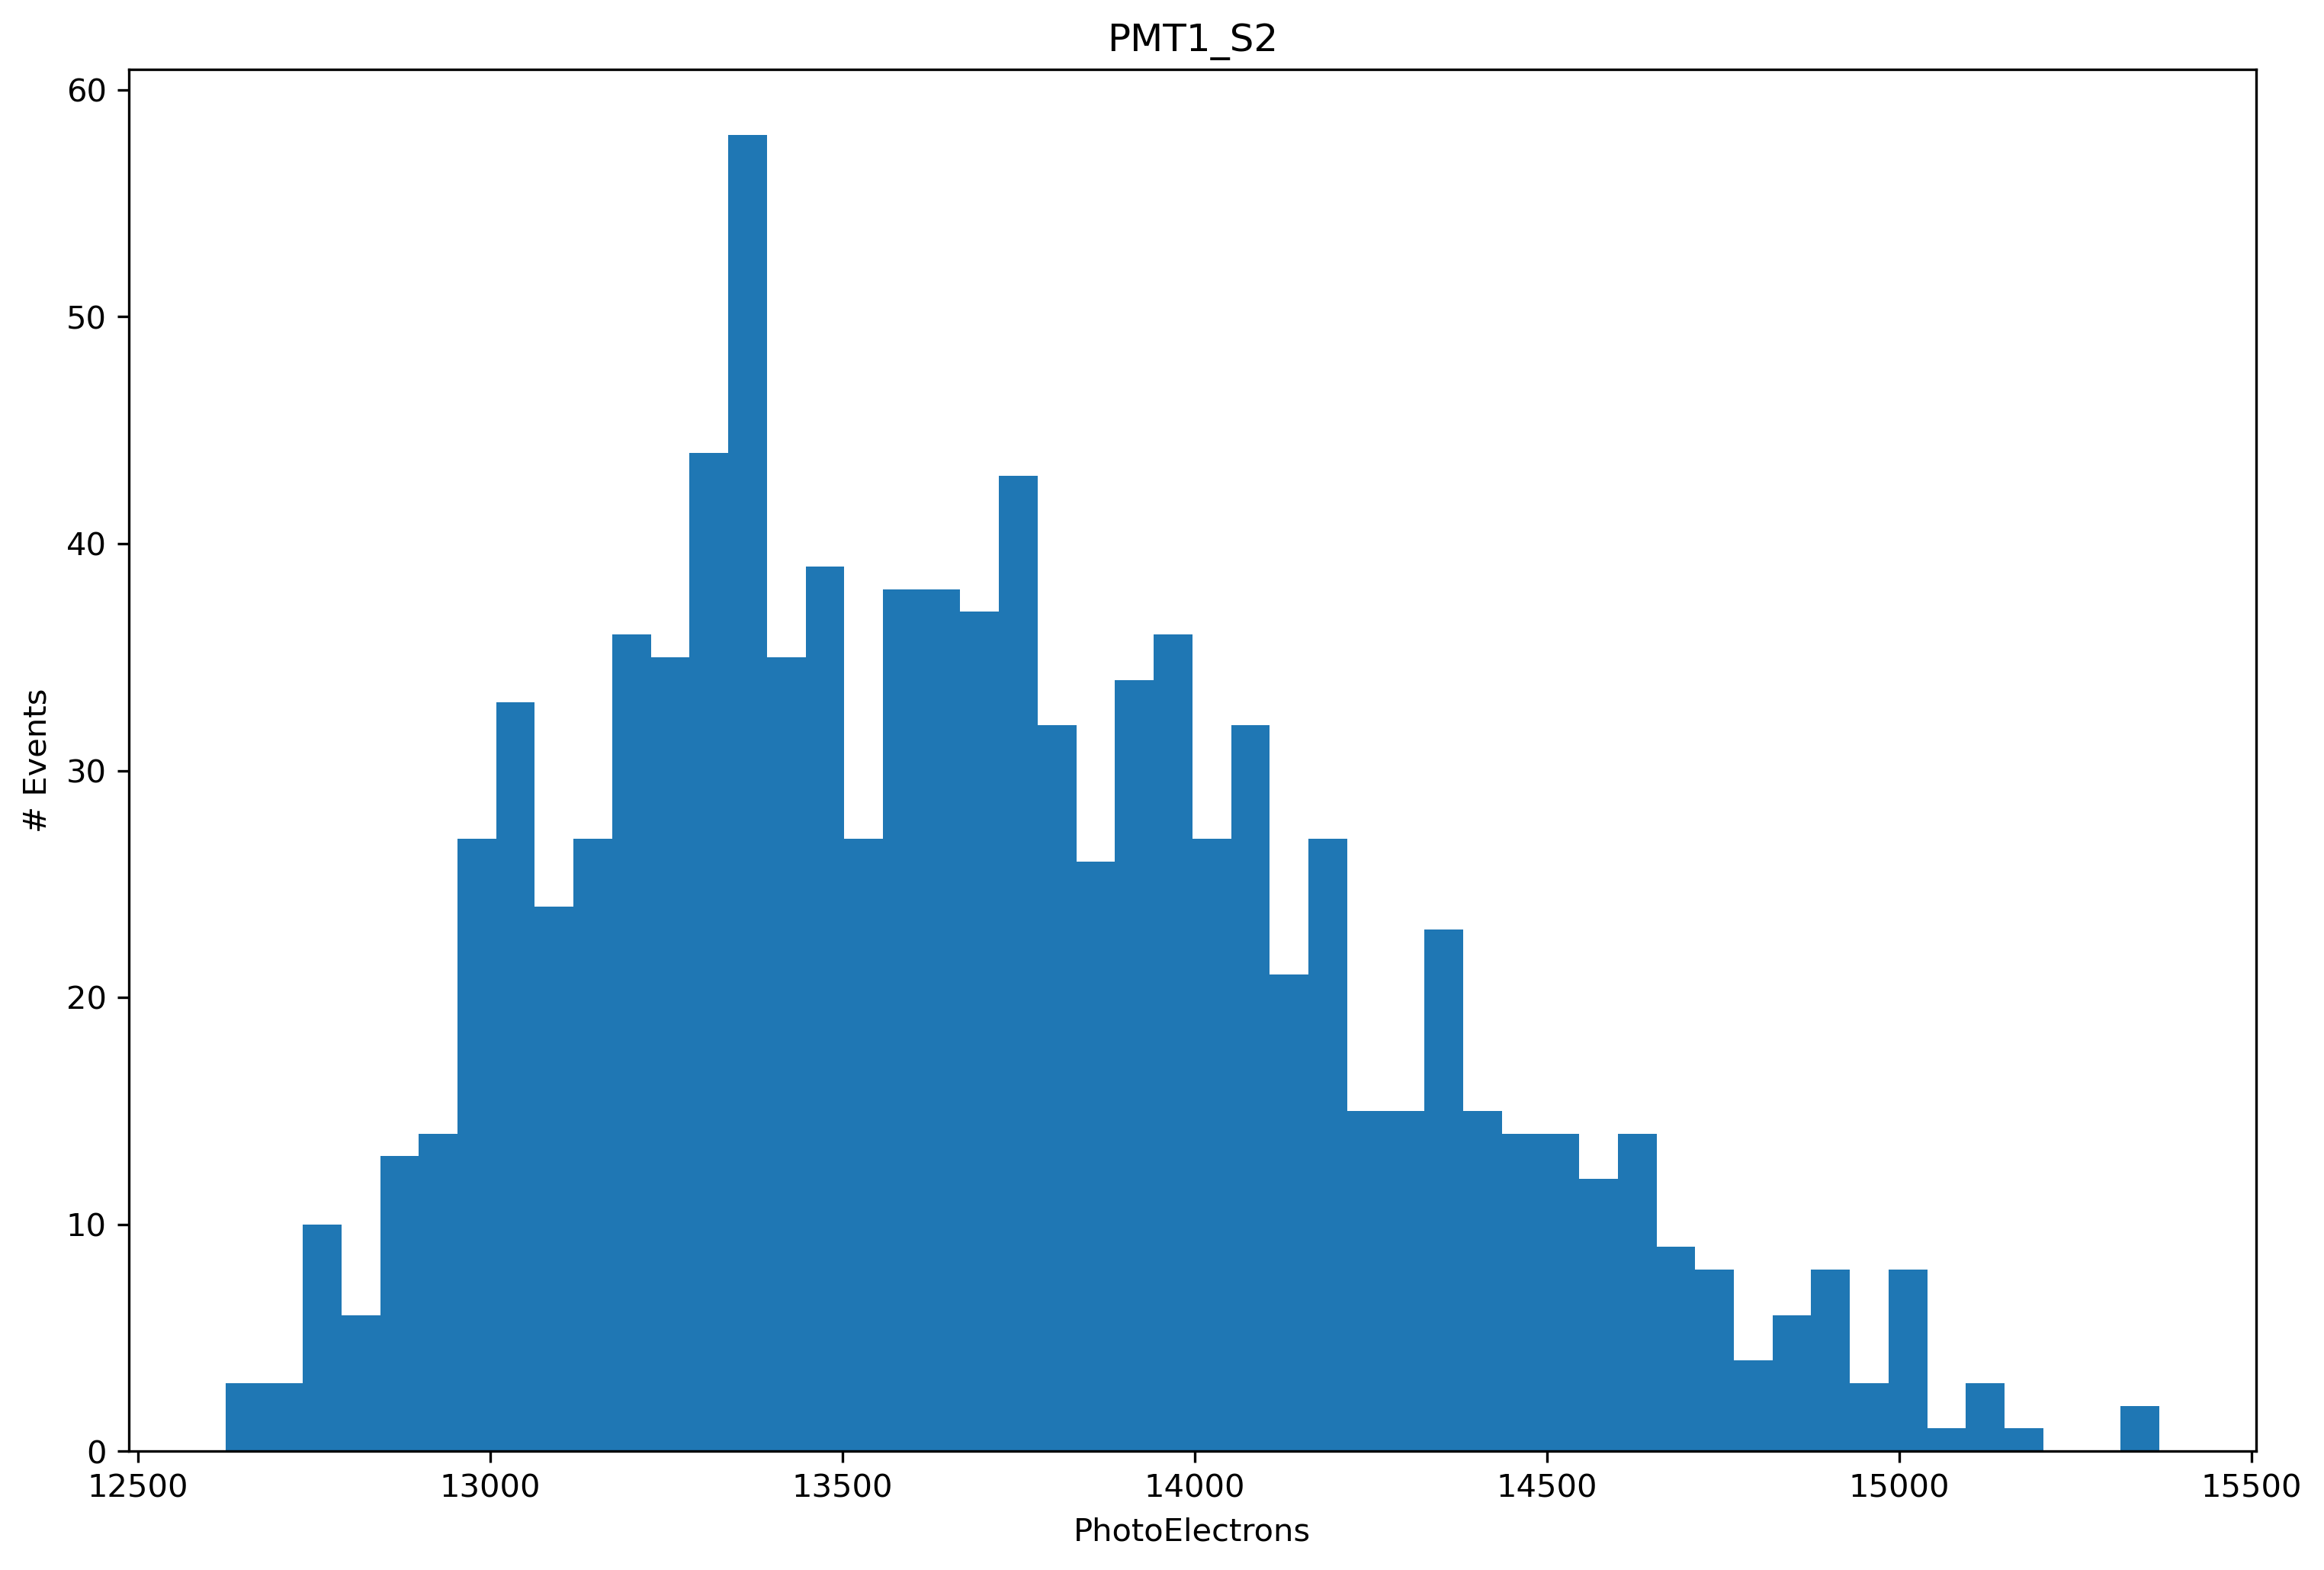

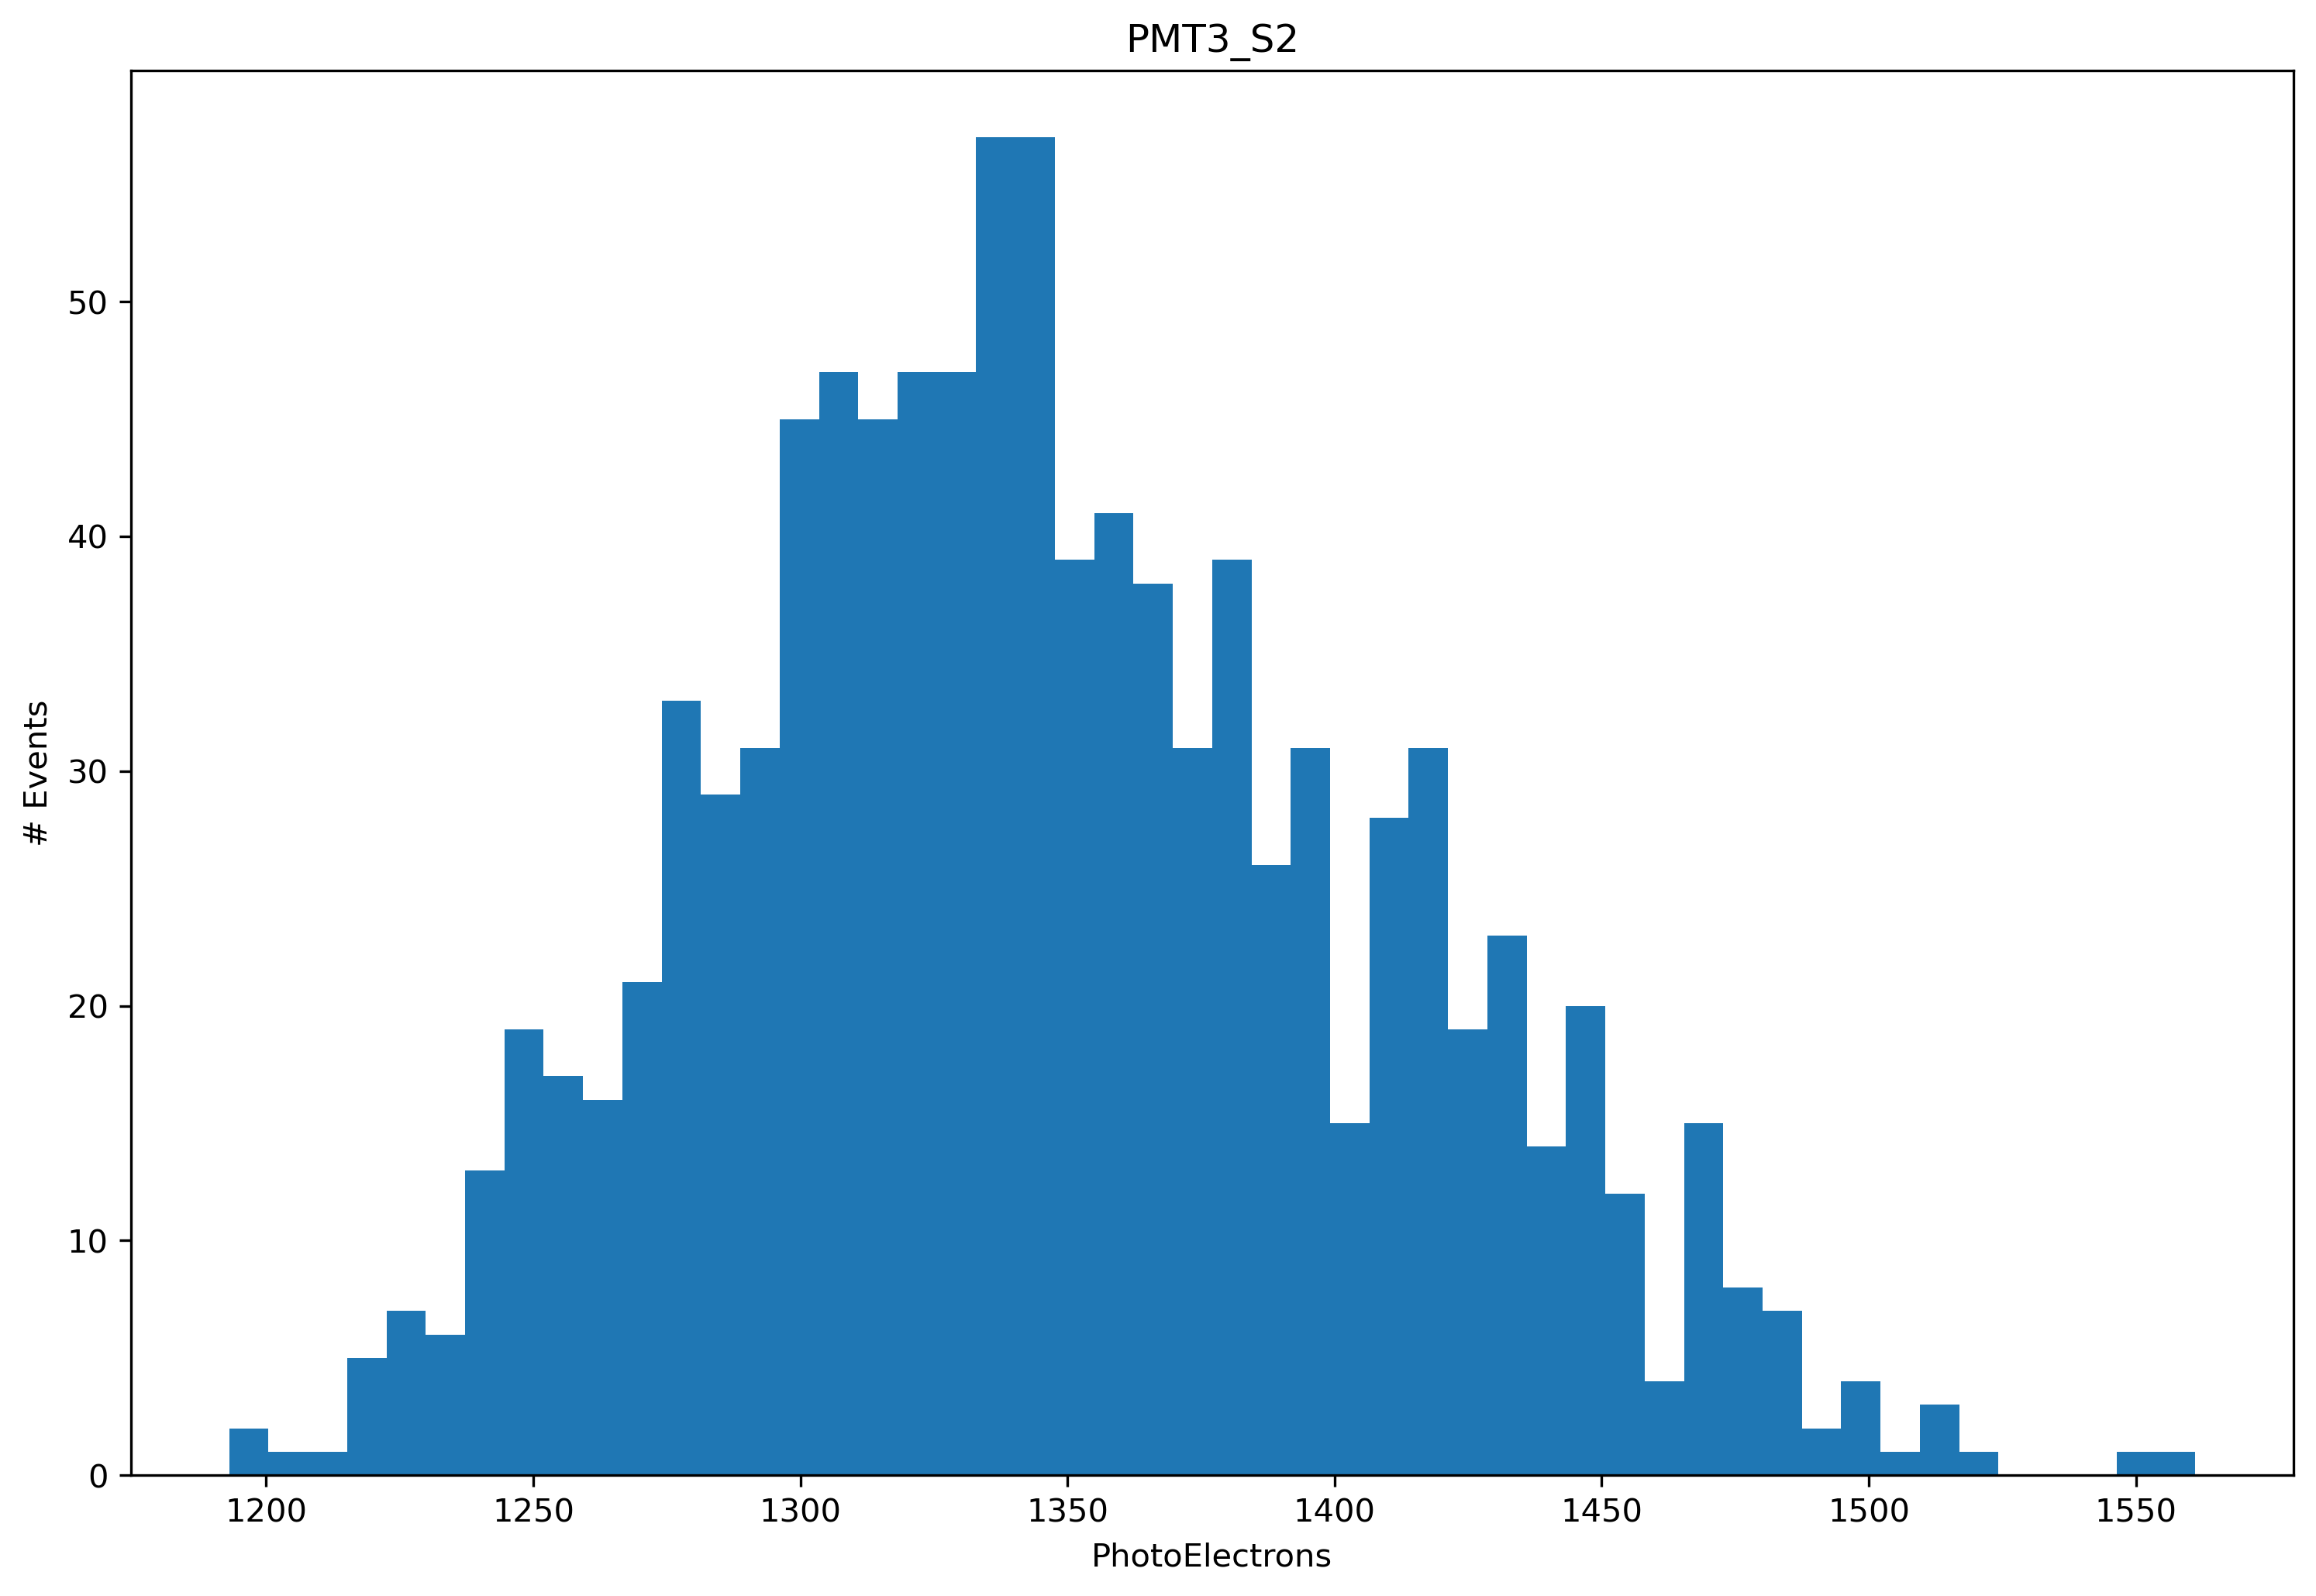

In [22]:
S2["S2_PHOTOCATHODE"]=S2["S2_PHOTOCATHODE"]-PMT1_S1_mean
S2["S1_PHOTOCATHODE"]=S2["S1_PHOTOCATHODE"]-PMT3_S1_mean

Histogram(S2["S2_PHOTOCATHODE"],"PhotoElectrons","# Events","PMT1_S2",bins=50)
Histogram(S2["S1_PHOTOCATHODE"],"PhotoElectrons","# Events","PMT3_S2",bins=50)


In [20]:

print("#### S2 Info ####")
mean=st.mean(S2["S1_PHOTOCATHODE"])
stdev=st.stdev(S2["S1_PHOTOCATHODE"])
print(f"mean = {mean} stdev = {stdev}")
mean=st.mean(S2["S2_PHOTOCATHODE"])
stdev=st.stdev(S2["S2_PHOTOCATHODE"])
print(f"mean = {mean} stdev={stdev}")

print("#### S1 Info ####")
mean=st.mean(S1["S1_PHOTOCATHODE"])
stdev=st.stdev(S1["S1_PHOTOCATHODE"])
print(f"mean = {mean} stdev = {stdev}")
mean=st.mean(S1["S2_PHOTOCATHODE"])
stdev=st.stdev(S1["S2_PHOTOCATHODE"])
print(f"mean = {mean} stdev={stdev}")

#### S2 Info ####
mean = 1351.4790939597312 stdev = 61.95873352207629
mean = 13717.335734693877 stdev=531.4651921334543
#### S1 Info ####
mean = 1.8214765100671142 stdev = 0.990042070246902
mean = 4.440816326530612 stdev=2.0736114634785463
